In [39]:
import pandas as pd
import numpy as np
import pickle as pkl
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
def load_pickles(path):
    business = pd.read_pickle(path)
    return business

In [4]:
business_path = "C:/Users/Nisha/Downloads/CSE-544-Project-master/CSE-544-Project-master/business.pickle"
bcategories_path = "C:/Users/Nisha/Downloads/CSE-544-Project-master/CSE-544-Project-master/business_categories.pickle"
business_attributes_path = "C:/Users/Nisha/Downloads/CSE-544-Project-master/CSE-544-Project-master/business_attribute.pickle" 

business=load_pickles(business_path)
business_category = load_pickles(bcategories_path)
business_attributes= load_pickles(business_attributes_path)


In [5]:
business=pd.DataFrame(data=business)
business_category=pd.DataFrame(data=business_category)
business_attributes=pd.DataFrame(data=business_attributes)

In [7]:
temp_business_attributes = business_attributes
temp_business_attributes = temp_business_attributes.drop(columns=['business_id'])

X_temp = pd.DataFrame(temp_business_attributes).as_matrix()
Y = pd.DataFrame(business['stars'])



In [8]:

for i in range(len(X_temp)):
    for j in range(len(X_temp[0])):
        if X_temp[i][j] == False:
            X_temp[i][j]=0
        else:
            X_temp[i][j]=1


In [10]:
X = pd.DataFrame(X_temp)

In [13]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

predictions = lm.predict(X)

In [14]:
print(predictions)[0:5]

[[3.91663192]
 [4.1426495 ]
 [3.56240418]
 ...
 [3.98051623]
 [4.10038969]
 [3.64354276]]


TypeError: 'NoneType' object is not subscriptable

In [15]:
lm.coef_

array([[-1.45022888e-01, -3.35779101e-01,  8.55380132e-03,
         1.12756962e-01, -2.33619453e-02,  1.80531731e-01,
         5.09503562e-01,  8.11385817e-02,  4.18112047e-01,
         9.21462057e-02, -4.42718663e-02,  1.05266600e-01,
         2.24443777e-01, -8.59867128e-01,  3.04955191e-02,
         1.76338148e-01, -6.00589664e-02, -5.26023957e-02,
        -7.78558141e-03, -2.15485572e-01,  8.97316369e-03,
        -2.00430920e-01,  1.84073104e-02, -7.22596550e-02,
        -3.73724372e-02, -1.80174053e-01,  6.35414820e-02,
        -4.07867374e-02, -8.70259232e-02,  5.16927120e-03,
         1.38598317e-01, -4.84521067e-02, -1.06369240e-01,
         2.77669591e-01,  4.40999210e-02, -2.13312625e-02,
         4.77291455e-02,  9.47882309e-03,  1.97745012e-01,
         2.09180264e-01, -1.23413296e-02,  9.66102234e-02,
         1.14554925e-02,  1.84154912e-02,  9.92428775e-02,
        -1.94947731e-01,  2.73602178e-03,  2.13515831e-02,
        -3.16082763e-02,  5.72125314e-02,  1.24374935e-0

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30, random_state=42)


In [19]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [23]:
predictions

array([[3.77151804],
       [3.59476252],
       [3.95737929],
       ...,
       [3.08097402],
       [3.55981812],
       [3.63830566]])

In [25]:
def compute_sse_mape(Y_hat,Y_true):
    
    error = Y_true - Y_hat
    error_t = np.transpose(error)
    sse = np.dot(error_t,error)
    
    y_hat = np.array(Y_hat)
    y_true = np.array(Y_true)
    
    sum_errors = 0
    
    for y_hat_i,y_true_i in zip(y_hat,y_true):
        error = float(y_true_i-y_hat_i)
        error_norm = np.absolute(error/float(y_true_i))*100
        sum_errors += error_norm
            
    n = Y_true.shape[0]
    mape = (1/float(n))*sum_errors
    return mape,float(sse)


In [37]:
y_test = np.array(y_test)

mape,sse = compute_sse_mape(predictions,y_test)
mape
#sse

28.416918509623116

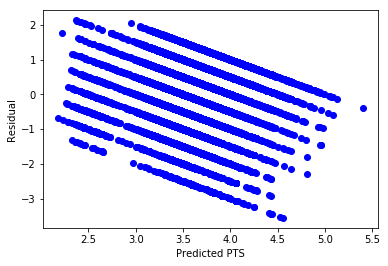

In [41]:
residual_i = y_test - predictions
plt.xlabel('Predicted PTS')
plt.ylabel('Residual')
plt.plot(predictions,residual_i,'bo')
plt.show()
    


ValueError: x and y must be the same size

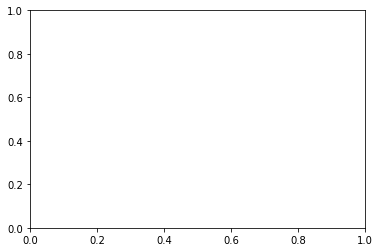

In [48]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [56]:
#predictions.size
#y_test.size
X_test.size

4242051